<a href="https://colab.research.google.com/github/NicoAN42/SKRPSI/blob/main/2022_Nadam_wo_Cbam_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from tensorflow.keras.layers import Conv2D, Input, concatenate, Activation, InputLayer, Dense, Reshape, Flatten, Add, multiply, Permute, Lambda, Concatenate
from tensorflow.keras.layers import LeakyReLU,ReLU, MaxPooling2D, BatchNormalization,GlobalMaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.activations import softmax,sigmoid
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout,SpatialDropout2D,GaussianDropout
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import l1,l2
from tensorflow.keras import backend as K
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import tensorflow
import tensorflow as tf
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score
from sklearn.model_selection import StratifiedKFold
import os
import random
import shutil

In [3]:
#from tensorflow.keras.optimizers import SGD

In [4]:
CLASS = 3
#sourcepath isi semua data train, folder valid kosongin datanya sisai folder classnya
sourcePath = '/content/drive/MyDrive/Colab Notebooks/Dataset 3'
train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 3/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 3/valid'
test_path = '/content/drive/MyDrive/Colab Notebooks/Dataset 3/test'
#attention_module = 'cbam_block'
#nico

In [5]:
classLabels =['covid','normal', 'pneumonia']

In [6]:
input = Input(shape=(256,256,3))

In [7]:
#Layer 1
model = layers.Conv2D(32, (3,3), padding='same', name='conv_1', activation = 'relu')(input)
model = layers.BatchNormalization(name='norm_1')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides= 2)(model)
#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])


In [8]:
#Layer 2
model = layers.Conv2D(64, (3,3), padding='same', name='conv_2', activation = 'relu')(model)
model = layers.Dropout(0.1)(model)
model = layers.BatchNormalization(name='norm_2')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])


In [9]:
# Layer 3
model = layers.Conv2D(64, (3,3), padding='same', name='conv_3', activation = 'relu')(model)
model = layers.BatchNormalization(name='norm_3')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])



In [10]:
# Layer 4
model = layers.Conv2D(128, (3,3), padding='same', name='conv_4', activation = 'relu')(model)
model = layers.Dropout(0.2)(model)
model = layers.BatchNormalization(name='norm_4')(model)
model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

#attention_module = 'cbam_block'
#y = attach_attention_module(model, attention_module)
#model =  tensorflow.keras.layers.add([model, y])


In [11]:
# Layer 5
model = layers.Conv2D(256, (3,3), padding='same', name='conv_5', activation = 'relu')(model)
layer = layers.Conv2D(256, (3,3), padding='same', name='conv_5', activation = 'relu')
batch = layers.BatchNormalization(name='norm_5')
model = layers.Dropout(0.2)(model)
model = layers.BatchNormalization(name='norm_5')(model)
#model = layers.MaxPooling2D(pool_size=(2, 2), strides = 2)(model)

In [12]:
model = layers.Flatten()(model)
model = layers.Dense(128, activation = 'relu')(model)
model = layers.Dropout(0.2)(model)
output = layers.Dense(3,Activation('softmax'))(model)
model = Model(input, output)

In [13]:
#output = model.output_shape

In [14]:
print(input)

KerasTensor(type_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


In [15]:
opt = Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [16]:
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=["accuracy"] )

In [17]:
print(model.summary())
print(model)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 norm_1 (BatchNormalization)  (None, 256, 256, 32)     128       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv_2 (Conv2D)             (None, 128, 128, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                             

In [18]:
X = []
Y = []
def transferBetweenFolders(source, dest, splitRate): 
    global sourceFiles
    sourceFiles=os.listdir(source)
    if(len(sourceFiles)!=0):
        transferFileNumbers=int(len(sourceFiles)*splitRate)
        transferIndex=random.sample(range(0, len(sourceFiles)), transferFileNumbers)
        for eachIndex in transferIndex:
            shutil.move(source+str(sourceFiles[eachIndex]), dest+str(sourceFiles[eachIndex]))
    else:
        print("No file moved. Source empty!")
        

In [19]:
def transferAllClassBetweenFolders(source, dest, splitRate):
    for label in classLabels:
        transferBetweenFolders(sourcePath+'/'+source+'/'+label+'/', 
                               sourcePath+'/'+dest+'/'+label+'/', 
                               splitRate)
#First cut all images from validation to train (if any exists)
transferAllClassBetweenFolders('valid', 'train', 1.0)
transferAllClassBetweenFolders('test', 'train', 1.0)
#no valid
#transferAllClassBetweenFolders('train', 'test', 0.2)

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!


In [20]:
def prepareNameWithLabels(folderName):
    sourceFiles=os.listdir(sourcePath+'/train/'+folderName)
    for val in sourceFiles:
        X.append(val)
        for i in range(len(classLabels)):
          if(folderName==classLabels[i]):
              Y.append(i)
# Organize file names and class labels in X and Y variables
for i in range(len(classLabels)):
  prepareNameWithLabels(classLabels[i])

def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='micro')
    f1Score=f1_score(y_true, y_pred, average='micro') 
    recall = recall_score(y_true, y_pred, average='micro')
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    print("Recall : {}".format(recall))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

    print("***----------------------------***")  
    return accuracy, precision, f1Score, recall

In [21]:
transferAllClassBetweenFolders('valid', 'train', 1.0)
#no valid
transferAllClassBetweenFolders('test', 'train', 1.0)
X=np.asarray(X)
Y=np.asarray(Y)

print(X)
print(Y)

skf = StratifiedKFold(n_splits=5
                      , shuffle=True)
skf.get_n_splits(X, Y)
print(skf)
print(skf.get_n_splits(X,Y))
print(skf.split(X,Y))
foldNum=0
overAllAcc = 0
overAllPrec = 0
overAllf1 = 0
overAllRec = 0

No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
['COVID(99).png' 'COVID(12).png' 'COVID(104).png' ...
 'person97_virus_180.jpeg' 'person98_virus_182.jpeg'
 'person97_virus_181.jpeg']
[0 0 0 ... 2 2 2]
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
5
<generator object _BaseKFold.split at 0x7f045a6e9550>


trn_indx: 2263 test_indx: 566
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 1
2263
566
Found 2263 images belonging to 3 classes.
Found 566 images belonging to 3 classes.
Epoch 1/25
71/71 - 788s - loss: 0.8278 - accuracy: 0.8798 - 788s/epoch - 11s/step
Epoch 2/25
71/71 - 25s - loss: 0.1592 - accuracy: 0.9593 - 25s/epoch - 353ms/step
Epoch 3/25
71/71 - 25s - loss: 0.1234 - accuracy: 0.9686 - 25s/epoch - 354ms/step
Epoch 4/25
71/71 - 25s - loss: 0.2085 - accuracy: 0.9554 - 25s/epoch - 354ms/step
Epoch 5/25
71/71 - 25s - loss: 0.1174 - accuracy: 0.9695 - 25s/epoch - 356ms/step
Epoch 6/25
71/71 - 25s - loss: 0.0659 - accuracy: 0.9823 - 25s/epoch - 353ms/step
Epoch 7/25
71/71 - 25s - loss: 0.0316 - accuracy: 0.9881 - 25s/epoch - 352ms/step
Epoch 8/25
71/71 - 25s - loss: 0.0262 - accuracy: 0.9903 - 25s/epoch - 350ms/step
Epoch 9/25
71/71 - 25s - loss

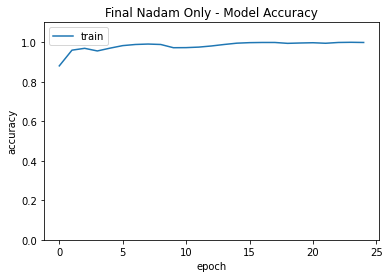

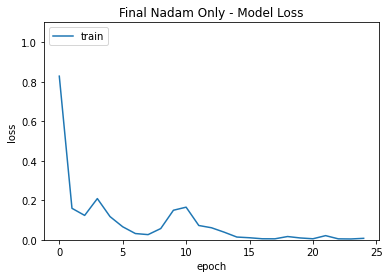

***Performance Data***
Accuracy  : 0.9787985865724381
Precision : 0.9787985865724381
f1Score : 0.9787985865724381
Recall : 0.9787985865724381
[[187   1   1]
 [  0 184   5]
 [  3   2 183]]
***----------------------------***
18/18 [==============================] - 7s 366ms/step - loss: 0.1032 - accuracy: 0.9788
Overall Accuracy:  0.9787985865724381
Overall Precision:  0.9787985865724381
Overall f1Score:  0.9787985865724381
Overall Recall:  0.9787985865724381
***------------------End of Line------------------***
trn_indx: 2263 test_indx: 566
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 2
2263
566
Found 2263 images belonging to 3 classes.
Found 566 images belonging to 3 classes.
Epoch 1/25
71/71 - 25s - loss: 0.1146 - accuracy: 0.9797 - 25s/epoch - 357ms/step
Epoch 2/25
71/71 - 26s - loss: 0.0501 - accuracy: 0.9854 - 26s/epoch - 359ms/step
Epoch 3/25
71/71 - 26s - loss: 0.0308 - accuracy: 0.9872 - 26s/epoch - 360ms/step
Epoch 4/25

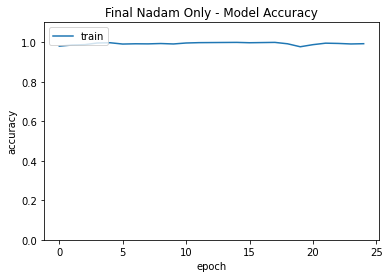

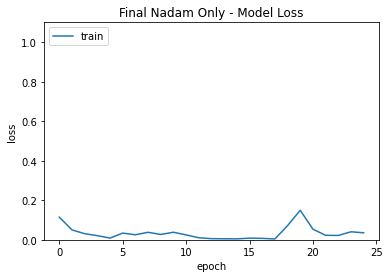

***Performance Data***
Accuracy  : 0.6943462897526502
Precision : 0.6943462897526502
f1Score : 0.6943462897526502
Recall : 0.6943462897526502
[[187   0   2]
 [ 54  19 115]
 [  2   0 187]]
***----------------------------***
18/18 [==============================] - 6s 357ms/step - loss: 0.7541 - accuracy: 0.6943
Overall Accuracy:  0.8365724381625441
Overall Precision:  0.8365724381625441
Overall f1Score:  0.8365724381625441
Overall Recall:  0.8365724381625441
***------------------End of Line------------------***
trn_indx: 2263 test_indx: 566
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 3
2263
566
Found 2263 images belonging to 3 classes.
Found 566 images belonging to 3 classes.
Epoch 1/25
71/71 - 25s - loss: 0.0319 - accuracy: 0.9920 - 25s/epoch - 355ms/step
Epoch 2/25
71/71 - 25s - loss: 0.0121 - accuracy: 0.9965 - 25s/epoch - 352ms/step
Epoch 3/25
71/71 - 25s - loss: 0.0099 - accuracy: 0.9969 - 25s/epoch - 352ms/step
Epoch 4/25

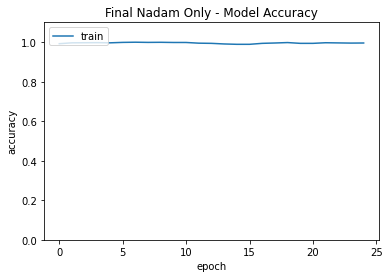

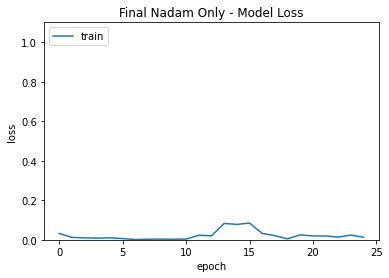

***Performance Data***
Accuracy  : 0.9858657243816255
Precision : 0.9858657243816255
f1Score : 0.9858657243816255
Recall : 0.9858657243816255
[[189   0   0]
 [  0 184   4]
 [  1   3 185]]
***----------------------------***
18/18 [==============================] - 6s 361ms/step - loss: 0.0320 - accuracy: 0.9859
Overall Accuracy:  0.8863368669022379
Overall Precision:  0.8863368669022379
Overall f1Score:  0.8863368669022379
Overall Recall:  0.8863368669022379
***------------------End of Line------------------***
trn_indx: 2263 test_indx: 566
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 4
2263
566
Found 2263 images belonging to 3 classes.
Found 566 images belonging to 3 classes.
Epoch 1/25
71/71 - 25s - loss: 0.0264 - accuracy: 0.9934 - 25s/epoch - 353ms/step
Epoch 2/25
71/71 - 25s - loss: 0.0377 - accuracy: 0.9934 - 25s/epoch - 355ms/step
Epoch 3/25
71/71 - 25s - loss: 0.0140 - accuracy: 0.9978 - 25s/epoch - 356ms/step
Epoch 4/25

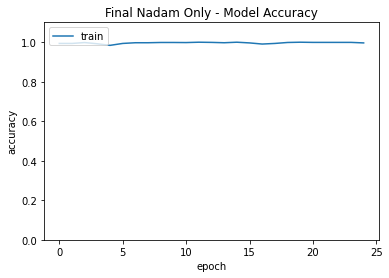

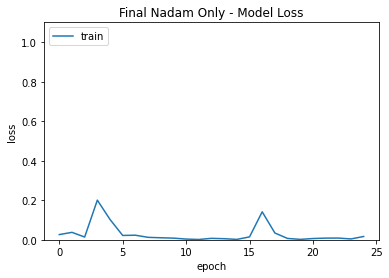

***Performance Data***
Accuracy  : 0.9929328621908127
Precision : 0.9929328621908127
f1Score : 0.9929328621908127
Recall : 0.9929328621908127
[[188   0   0]
 [  0 189   0]
 [  0   4 185]]
***----------------------------***
18/18 [==============================] - 6s 343ms/step - loss: 0.0294 - accuracy: 0.9929
Overall Accuracy:  0.9129858657243816
Overall Precision:  0.9129858657243816
Overall f1Score:  0.9129858657243816
Overall Recall:  0.9129858657243816
***------------------End of Line------------------***
trn_indx: 2264 test_indx: 565
No file moved. Source empty!
No file moved. Source empty!
No file moved. Source empty!
Results for fold 5
2264
565
Found 2264 images belonging to 3 classes.
Found 565 images belonging to 3 classes.
Epoch 1/25
71/71 - 25s - loss: 0.0135 - accuracy: 0.9973 - 25s/epoch - 348ms/step
Epoch 2/25
71/71 - 25s - loss: 0.0100 - accuracy: 0.9978 - 25s/epoch - 351ms/step
Epoch 3/25
71/71 - 25s - loss: 0.0060 - accuracy: 0.9991 - 25s/epoch - 352ms/step
Epoch 4/25

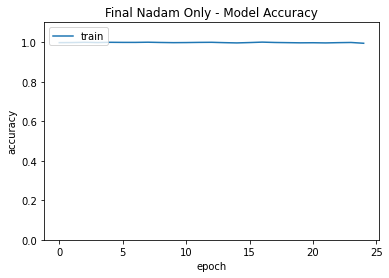

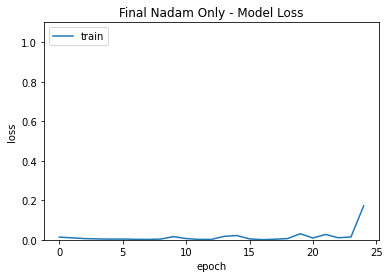

***Performance Data***
Accuracy  : 0.9486725663716814
Precision : 0.9486725663716814
f1Score : 0.9486725663716814
Recall : 0.9486725663716814
[[167   8  13]
 [  0 185   4]
 [  0   4 184]]
***----------------------------***
18/18 [==============================] - 6s 359ms/step - loss: 0.9111 - accuracy: 0.9487
Overall Accuracy:  0.9201232058538416
Overall Precision:  0.9201232058538416
Overall f1Score:  0.9201232058538416
Overall Recall:  0.9201232058538416
***------------------End of Line------------------***


In [22]:
for train_index, val_index in skf.split(X, Y):
    print("trn_indx: %s test_indx: %s" % (len(train_index), len(val_index)))
    #First cut all images from validation to train (if any exists)
    transferAllClassBetweenFolders('valid', 'train', 1.0)
    #no valid
    transferAllClassBetweenFolders('test', 'train', 1.0)
    foldNum+=1
    print("Results for fold",foldNum)
    X_train, X_val = X[train_index], X[val_index]
    Y_train, Y_val = Y[train_index], Y[val_index]
    print(len(X_train))
    print(len(X_val))
    # Move validation images of this fold from train folder to the validation folder
    for eachIndex in range(len(X_val)):
        classLabel=''
        for i in range(len(classLabels)):
          if(Y_val[eachIndex]==i):
              classLabel=classLabels[i]
        #Then, copy the validation images to the validation folder
        shutil.move(sourcePath+'/train/'+classLabel+'/'+X_val[eachIndex], 
                    #sourcePath+'/valid/'+classLabel+'/'+X_val[eachIndex])
        #without valid
                    sourcePath+'/test/'+classLabel+'/'+X_val[eachIndex])
        
    train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32, shuffle=True)
    #without valid
    #valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32, shuffle=True)
    test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(256,256), classes=['covid', 'normal', 'pneumonia'], class_mode = 'sparse', batch_size = 32, shuffle=False)

    history = model.fit(train_batches, 
                    #steps_per_epoch=sp_epoch, 
                    #without valid
                    #validation_data=valid_batches, 
                    #validation_steps=10, 
                    epochs=25, 
                    verbose=2)
    
    
    
    plt.plot(history.history['accuracy'])
    #plt.plot(history.history['val_accuracy'])
    plt.title('Final Nadam Only - Model Accuracy')
    plt.ylim(0,1.1)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    #plt.legend(['train', 'valid'], loc='upper left')
    #without valid
    plt.legend(['train'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])
    plt.title('Final Nadam Only - Model Loss')
    plt.ylim(0,1.1)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    #plt.legend(['train', 'valid'], loc='upper left')
    #without valid
    plt.legend(['train'], loc='upper left')
    plt.show()
    test_batches.reset()
    Y_pred = model.predict(test_batches)
    classes = test_batches.classes[test_batches.index_array]
    y_pred = np.argmax(Y_pred, axis=-1)
    #print("***Performance on Test Data***")  
    #print(sum(y_pred==classes)/10000)
    confusion_matrix(test_batches.classes[test_batches.index_array],y_pred)
    #predictions = model.predict(test_batches, verbose=1)
    #yPredictions = np.argmax(predictions, axis=1)
    #print(yPredictions)
    #true_classes = test_batches.classes
    # evaluate validation performance
    print("***Performance Data***")    
    #valAcc, valPrec, valFScore = my_metrics(true_classes, yPredictions)
    valAcc, valPrec, valFScore, valRec = my_metrics(classes, y_pred)
    overAllAcc = overAllAcc+valAcc
    overAllPrec = overAllPrec+valPrec
    overAllf1 = overAllf1+valFScore
    overAllRec = overAllRec+valRec
    
    model.evaluate(test_batches)
    print("Overall Accuracy: ",  overAllAcc/foldNum)
    print("Overall Precision: ",  overAllPrec/foldNum)
    print("Overall f1Score: ",  overAllf1/foldNum)
    print("Overall Recall: ",  overAllRec/foldNum)

    print("***------------------End of Line------------------***")